<a href="https://colab.research.google.com/github/sanahashmat/Image-Video-processing/blob/main/frequency_filtering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

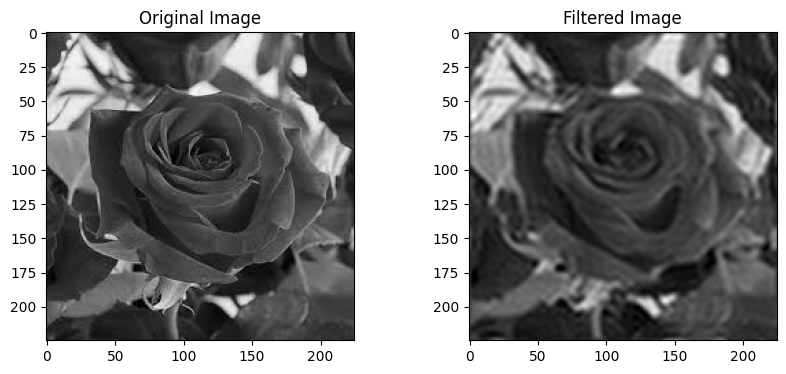

In [1]:
# Program 7: Frequency Domain Filtering using FFT
# Objective: Remove noise from an image using Low-Pass Filtering in frequency domain

import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load grayscale image
img = cv2.imread('/content/rose flower.jpg', cv2.IMREAD_GRAYSCALE)

# Perform FFT
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)

# Create a low-pass filter mask
rows, cols = img.shape
crow, ccol = rows//2, cols//2
mask = np.zeros((rows, cols), np.uint8)
mask[crow-30:crow+30, ccol-30:ccol+30] = 1

# Apply mask
filtered = fshift * mask

# Inverse FFT
ifft_shift = np.fft.ifftshift(filtered)
img_back = np.fft.ifft2(ifft_shift)
img_back = np.abs(img_back)

# Display results
plt.figure(figsize=(10,4))
plt.subplot(1,2,1), plt.imshow(img, cmap='gray'), plt.title('Original Image')
plt.subplot(1,2,2), plt.imshow(img_back, cmap='gray'), plt.title('Filtered Image')
plt.show()
